In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as stm
from sklearn.model_selection import train_test_split
import time as time
import itertools
%matplotlib inline

#Reads csv file for real estate information
estate = pd.read_csv(r"C:\Users\jaylo\Downloads\Real estate.csv")

#Produces first ten rows of data
estate.head(10)

,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2014,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2014,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2013,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2013,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2013,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2014,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013,17.9,1783.18000,3,24.96731,121.51486,22.1


In [2]:
#Produces last ten rows of data
estate.tail(10)

,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
404,405,2013,16.4,289.32480,5,24.98203,121.54348,41.2
405,406,2013,23.0,130.99450,6,24.95663,121.53765,37.2
406,407,2013,1.9,372.13860,7,24.97293,121.54026,40.5
407,408,2013,5.2,2408.99300,0,24.95505,121.55964,22.3
408,409,2013,18.5,2175.74400,3,24.96330,121.51243,28.1
409,410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2013,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2014,6.5,90.45606,9,24.97433,121.54310,63.9


In [3]:
# Drop categorical column, load a list of the column headers
columns = list(pd.read_csv(r"C:\Users\jaylo\Downloads\Real estate.csv", nrows=1))
print(columns)

# Read the file using only the first 14 columns
estate = pd.read_csv(r"C:\Users\jaylo\Downloads\Real estate.csv", usecols = [i for i in range(8)])
estate.head(10)

['No.', 'transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']


,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2014,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2014,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2013,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2013,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2013,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2014,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No.                                  414 non-null    int64  
 1   transaction date                     414 non-null    int64  
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [5]:
estate.describe()

,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.169082,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.375278,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2013.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2013.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2014.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


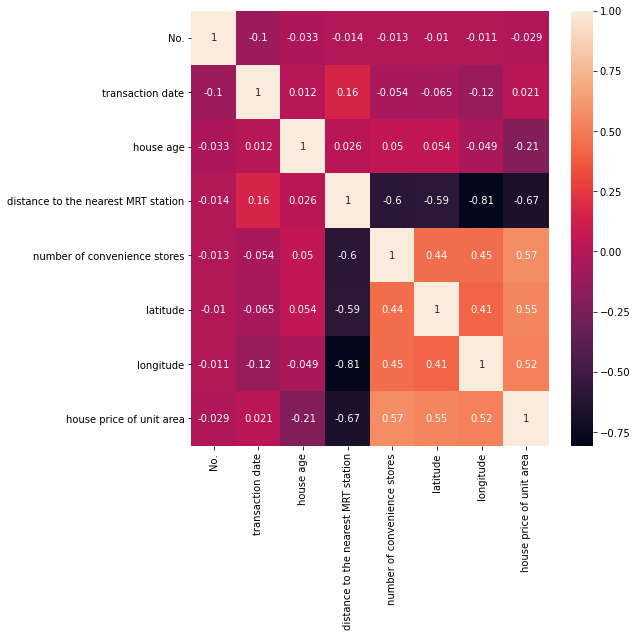

In [6]:
plt.figure(figsize=(8, 8))
correlation_matrix = estate.corr().round(3)
sbn.heatmap(data = correlation_matrix, annot = True)
plt.savefig('corr.png')

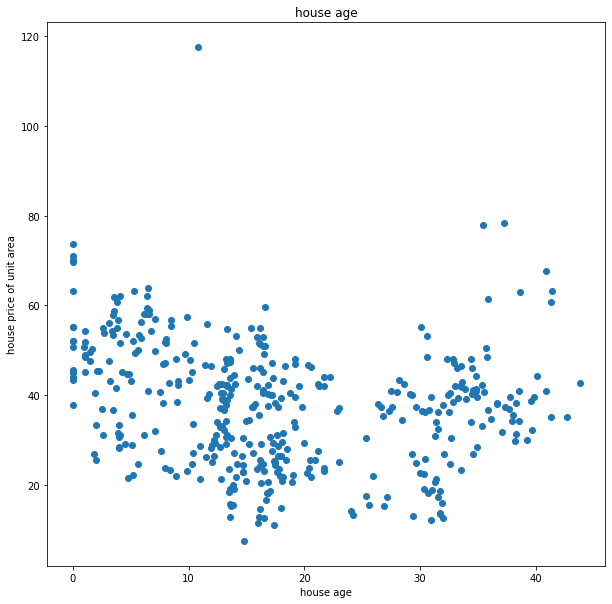

In [7]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['house age']):
    plt.subplot(1, len(['house age']) , i+1)
    x = estate[col]
    y = estate['house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house price of unit area')
    
plt.savefig('linear1.png')

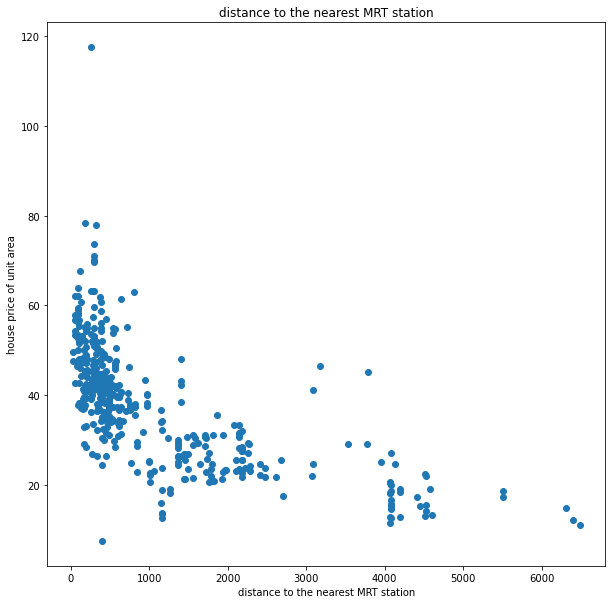

In [8]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['distance to the nearest MRT station']):
    plt.subplot(1, len(['distance to the nearest MRT station']) , i+1)
    x = estate[col]
    y = estate['house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house price of unit area')
    
plt.savefig('linear2.png')

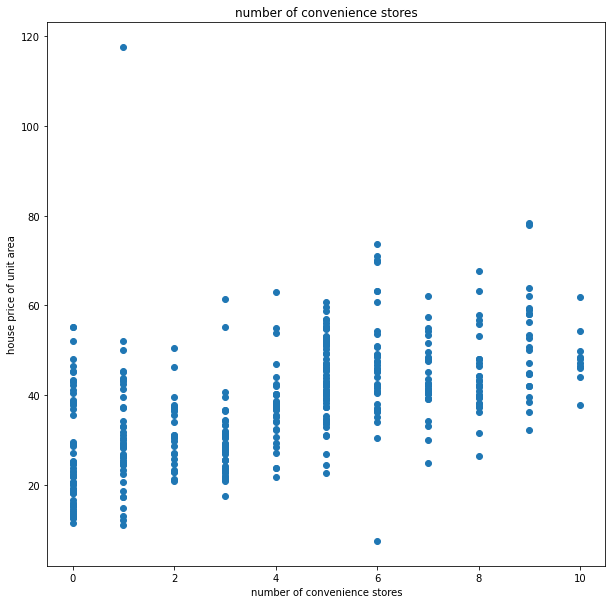

In [9]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['number of convenience stores']):
    plt.subplot(1, len(['number of convenience stores']) , i+1)
    x = estate[col]
    y = estate['house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house price of unit area')
    
plt.savefig('linear3.png')

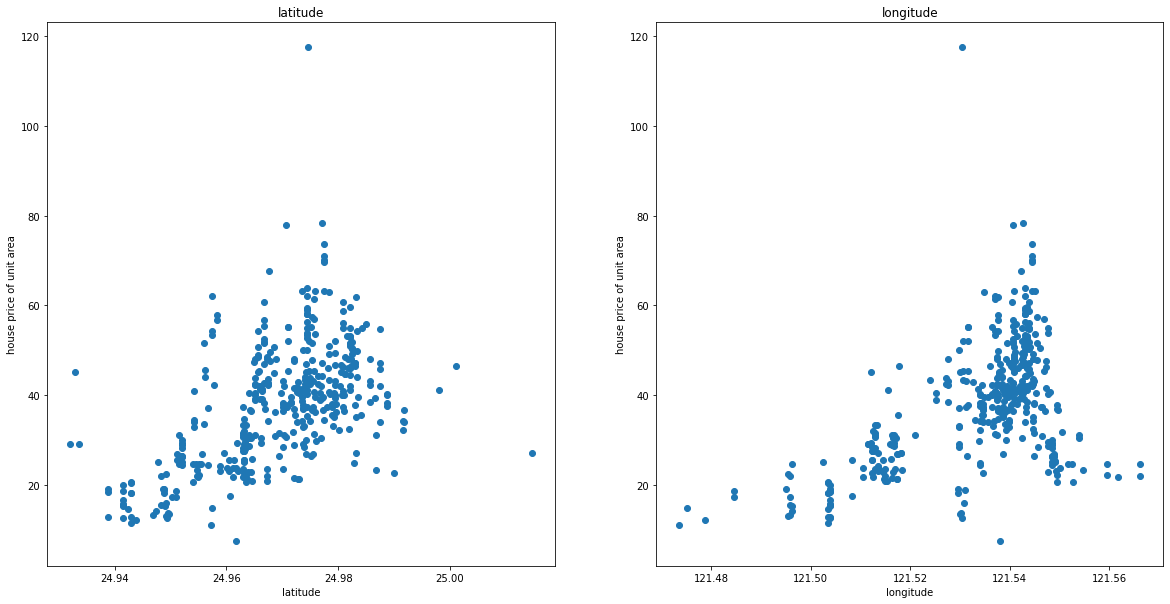

In [10]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(['latitude','longitude']):
    plt.subplot(1, len(['latitude','longitude']) , i+1)
    x = estate[col]
    y = estate['house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house price of unit area')
    
plt.savefig('linear4.png')

In [11]:
np.random.seed(0)
df_train, df_test = train_test_split(estate, train_size = 0.6, test_size = 0.4, random_state = 100)
df_train.head(10)

,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
32,33,2013,37.9,488.5727,1,24.97349,121.53451,34.2
48,49,2013,24.2,4605.7490,0,24.94684,121.49578,13.4
344,345,2014,34.6,3085.1700,0,24.99800,121.51550,41.2
269,270,2013,17.6,837.7233,0,24.96334,121.54767,23.0
123,124,2013,0.0,185.4296,0,24.97110,121.53170,45.5
187,188,2013,8.9,3078.1760,0,24.95464,121.56627,22.0
302,303,2014,16.5,2288.0110,3,24.95885,121.51359,23.2
61,62,2014,5.3,259.6607,6,24.97585,121.54516,63.2
71,72,2013,35.5,640.7391,3,24.97563,121.53715,40.8
321,322,2013,16.9,964.7496,4,24.98872,121.53411,37.7


In [12]:
df_train.tail(10)

,No.,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
53,54,2013,13.3,492.2313,5,24.96515,121.53737,38.9
354,355,2013,12.2,1360.1390,1,24.95204,121.54842,30.1
350,351,2013,13.2,492.2313,5,24.96515,121.53737,42.3
394,395,2014,32.6,4136.2710,1,24.95544,121.49630,24.7
79,80,2013,18.0,1414.8370,1,24.95182,121.54887,26.5
343,344,2013,33.5,563.2854,8,24.98223,121.53597,46.6
359,360,2014,5.6,2408.9930,0,24.95505,121.55964,24.7
323,324,2013,28.6,197.1338,6,24.97631,121.54436,42.5
280,281,2013,2.3,184.3302,6,24.96581,121.54086,45.4
8,9,2014,31.7,5512.0380,1,24.95095,121.48458,18.8


In [13]:
#Start Building the Model
# Dividing the training data set into independent variables and outcome or target variable
df_train
y_train = df_train.pop('house price of unit area')
x_train = df_train

#uses the statistical models api stm
#uses https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
x_train_lm = stm.add_constant(x_train)

Linear_Regression_Model= stm.OLS(y_train, x_train_lm).fit()

Linear_Regression_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house price of unit area   R-squared:                       0.559
Model:                                  OLS   Adj. R-squared:                  0.547
Method:                       Least Squares   F-statistic:                     43.54
Date:                      Mon, 08 Nov 2021   Prob (F-statistic):           2.24e-39
Time:                              14:02:13   Log-Likelihood:                -914.66
No. Observations:                       248   AIC:                             1845.
Df Residuals:                           240   BIC:                             1873.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.029e+04   9323.505     -1.103      0.271   -2.87e+04    8078.232
No.                                    -0.0009      0.005     -0.166      0.869      -0.011       0.010
transaction date                        4.6482      1.614      2.881      0.004       1.469       7.827
house age                              -0.2930      0.055     -5.297      0.000      -0.402      -0.184
distance to the nearest MRT station    -0.0048      0.001     -4.787      0.000      -0.007      -0.003
number of convenience stores            1.1021      0.258      4.275      0.000       0.594       1.610
latitude                              219.8522     64.220      3.423      0.001      93.345     346.360
longitude                             -37.1470     69.033     -0.538      0.591    -173.135      98.841
==============================================================================
Omnibus:                      167.611   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2844.798
Skew:                           2.366   Prob(JB):                         0.00
Kurtosis:                      18.903   Cond. No.                     3.69e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Building the Model
# Split the training data set into independent variables and outcome or target variable
print ("y_train: ",y_train)
print()
print()
print (" x_train: ", x_train)

y_train:  32     34.2
48     13.4
344    41.2
269    23.0
123    45.5
       ... 
343    46.6
359    24.7
323    42.5
280    45.4
8      18.8
Name: house price of unit area, Length: 248, dtype: float64


 x_train:       No.  transaction date  house age  distance to the nearest MRT station  \
32    33              2013       37.9                             488.5727   
48    49              2013       24.2                            4605.7490   
344  345              2014       34.6                            3085.1700   
269  270              2013       17.6                             837.7233   
123  124              2013        0.0                             185.4296   
..   ...               ...        ...                                  ...   
343  344              2013       33.5                             563.2854   
359  360              2014        5.6                            2408.9930   
323  324              2013       28.6                             197.1338   
280  

In [15]:
#uses the statistical models api stm
#uses https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
x_train_lm = stm.add_constant(x_train)

Linear_Regression_Model= stm.OLS(y_train,x_train_lm).fit()

Linear_Regression_Model.summary()
print(x_train.columns)

Index(['No.', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude'],
      dtype='object')


In [16]:
#Argument: A subset of features, Returns: A model with associated Adjusted R-Squared Value
def processSubset(feature_set):
    L_R_Model= stm.OLS(y_train,x_train_lm[list(feature_set)])
    rm=L_R_Model.fit()
    r_squared=rm.rsquared_adj
    #print("Model: ", rm, "Adjusted R-Squared: ", r_squared)
    return {"Model":rm, "Adjusted R-Squared":r_squared}

In [17]:
#Returns the best model with k features by comparing Adjusted R-Squared

def getBest(k):
    
    start_time = time.time()
    
    results = []
    #for combo in itertools.combinations(X.columns, k):
    x_train_ca = stm.add_constant(x_train)
    for combo in itertools.combinations(x_train_ca.columns, k): 
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
   
    # Choose the model with the highest Adjusted R-Squared
    best_model = models.loc[models['Adjusted R-Squared'].argmax()]
    
    end_time = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (end_time-start_time), "seconds.")
    
    return best_model

In [18]:
#Creates a DataFrame with the best model with each number of predictors

model_dFrame = pd.DataFrame(columns=["Adjusted R-Squared", "Model"])

start_time = time.time()
for i in range(1,8):
    model_dFrame.loc[i] = getBest(i)
    #print(model_dFrame.loc[i])
end_time = time.time()
print("Elapsed time:", (end_time-start_time), "seconds.")

Processed 8 models on 1 predictors in 0.036623239517211914 seconds.
Processed 28 models on 2 predictors in 0.10663008689880371 seconds.
Processed 56 models on 3 predictors in 0.21288394927978516 seconds.
Processed 70 models on 4 predictors in 0.23213696479797363 seconds.
Processed 56 models on 5 predictors in 0.1918187141418457 seconds.
Processed 28 models on 6 predictors in 0.09627985954284668 seconds.
Processed 8 models on 7 predictors in 0.03447222709655762 seconds.
Elapsed time: 0.9627242088317871 seconds.


In [19]:
for i in range(1,8):
        print("\n\nBest model with ",i," features\n\n")
        #print(model_dFrame.loc[i, "Model"].summary())
        print(model_dFrame.loc[i, "Adjusted R-Squared"])
        print(model_dFrame.loc[i, "Model"].params)



Best model with  1  features


0.868108309924863
latitude    1.49968
dtype: float64


Best model with  2  features


0.9250028312725449
distance to the nearest MRT station   -0.007159
latitude                               1.838282
dtype: float64


Best model with  3  features


0.9298342652798441
distance to the nearest MRT station   -0.005622
number of convenience stores           1.159570
latitude                               1.589729
dtype: float64


Best model with  4  features


0.9358434518218626
house age                             -0.278190
distance to the nearest MRT station   -0.005277
number of convenience stores           1.295114
latitude                               1.753654
dtype: float64


Best model with  5  features


0.9387557094564773
house age                               -0.297147
distance to the nearest MRT station     -0.004538
number of convenience stores             1.181409
latitude                               217.430712
longitude                    

In [20]:
#Manage our test parition
df_test
y_test = df_test.pop('house price of unit area')
x_test = df_test
y_test.head()

121    48.0
353    31.3
96     59.5
43     34.1
125    48.6
Name: house price of unit area, dtype: float64

In [21]:
#Drop the columns we don't want
#df = df.drop(columns=['column_nameA', 'column_nameB'])
x_train_1=x_train.drop(columns=['No.','number of convenience stores'])
x_test_1=x_test.drop(columns=['No.','number of convenience stores'])
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
print (x_train_1.head(0))
lr_model.fit(x_train_1,y_train) #THIS IS THE LINEAR REGRESSION

Empty DataFrame
Columns: [transaction date, house age, distance to the nearest MRT station, latitude, longitude]
Index: []


LinearRegression()

In [22]:
#Now let's print the coefficients in our linear equation, our model
print(lr_model.coef_)

#Run our model on the test data and get the predicted values for house price of unit area

y_test_pred = lr_model.predict(x_test_1)
print("\n\nx_test_1\n",x_test_1)

[ 5.39444070e+00 -2.70786104e-01 -6.16981291e-03  2.52683530e+02
 -3.97773244e+01]


x_test_1
      transaction date  house age  distance to the nearest MRT station  \
121              2014       13.6                            492.23130   
353              2014        4.1                           2147.37600   
96               2013        6.4                             90.45606   
43               2013       34.4                            512.78710   
125              2013        1.1                            193.58450   
..                ...        ...                                  ...   
247              2013       21.7                           1055.06700   
142              2013       19.8                            640.60710   
219              2013       29.3                            529.77710   
40               2013       13.6                           4082.01500   
275              2013        1.5                             23.38284   

     latitude  longitude  
1

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE: ",sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE:  7.657808176896557


In [24]:
#Make a list of our new data and convert it to a Pandas Dataframe

new_house_data_list=[[2015,5.2,265.467,24.986058,121.52727]]
new_df=pd.DataFrame(new_house_data_list,columns=['transaction date','house age', 'distance to the nearest MRT station', 'latitude', 'longitude'])
print(new_df)

real_estate_price_prediction=lr_model.predict(new_df)

print("The predicted real estate price in Taiwan based on that data is: ",real_estate_price_prediction)


   transaction date  house age  distance to the nearest MRT station  \
0              2015        5.2                              265.467   

    latitude  longitude  
0  24.986058  121.52727  
The predicted real estate price in Taiwan based on that data is:  [60.97640406]
